# The Battle of Neighborhoods 

## Introduction
I am a Chinese student studying in Vancouver, Canada. I like the scenery and the humanities here. I enjoy my life here. However, I am not really used to eating local food. I want to do a project. Go to find some Chinese restaurants and go to meet up with my Chinese friends.

## Dataset
The major purpose of this project is to find out which area or neighborhood has more Chinese restaurants. First, we need to have the dataset ready. Here are the two datasets that I will use:
1. A csv file named "information_week4.csv" that contains the postal code, borough, neighborbood, Latitude, and Longitude
2. Foursquare API location data to get information about restaurants and their ratings

## Methodology
First, we should import the necessary libraries we need

In [1]:
import requests
import os
import pandas as pd
import numpy as np
import folium 
from geopy.geocoders import Nominatim 
from matplotlib import *
%matplotlib inline
import seaborn as sns

Second, I need to import all my datasets for my analysis.

In [39]:
postal_df = pd.read_csv("information_week4.csv")
postal_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,V1M,Langley Township,North,49.1675,-122.5956
1,V2S,Abbotsford,Southeast,49.0172,-122.2843
2,V2T,Abbotsford,Southwest,49.0406,-122.3535
3,V2W,Maple Ridge,East,49.2030,-122.4830
4,V2X,Maple Ridge,West,49.2228,-122.6175


Then I need to import foursquare data.

In [17]:
url = "https://api.foursquare.com/v2/venues/explore?client_id=MQHKJ53MZHBDNU3G5XF4YASFCM4JX1KNN1QRTYG3ZVSQVTBC&client_secret=KUK4R1D1MWNMCKCIFBUDXY2543CORSN350VAH50J3ZWRHFPA&v=20200501&ll=49.2827,-123.1207&radius=100000&query=Chinese%20restaurant&limit=100"

results = requests.get(url).json()["response"]['groups'][0]['items']
venues = []
for row in results:
    try:
        venue_id = row['venue']['id']
        venue_name = row['venue']['name']
        venue_postal = row['venue']['location']['postalCode'], 
        venue_category = row['venue']['categories'][0]['name']
        venues.append([venue_id,venue_name,venue_postal,venue_category])
    except KeyError:
        pass
column_names = ['ID','Name','postal','Category']
df = pd.DataFrame(venues,columns = column_names)
df

,ID,Name,postal,Category
0,4aa7fa59f964a5206c4e20e3,Shanghai River Restaurant,"(V6X 4J4,)",Chinese Restaurant
1,4ab04bfaf964a520ed6620e3,Peaceful Restaurant 和平饭店,"(V5Z 1E9,)",Chinese Restaurant
2,4aa6f0caf964a5208e4b20e3,Congee Noodle House 粥麵館 (Congee Noodle House),"(V5T 1W1,)",Chinese Restaurant
3,4ac66e65f964a52055b420e3,Kirin Seafood Restaurant 麒麟海鮮酒家,"(V6X 1A5‎,)",Chinese Restaurant
4,552abd3f498ec6ce69425a9d,Deer Garden Signatures 鹿園魚湯米線,"(V6X 3Z9,)",Chinese Restaurant
...,...,...,...,...
64,5006e38be4b0831ec3cac976,Double Double Restaurant 老油条,"(V6X 2C2,)",Chinese Restaurant
65,4ae94179f964a520a3b421e3,Rose Garden,"(V5R 5L3,)",Chinese Restaurant
66,4beeff5cf2712d7ff324fbd8,Leung Kee Congee & Noodles,"(V6X 4J7,)",Chinese Restaurant
67,4b663d68f964a520451a2be3,Lee Yuen,"(‎ V3R 5X4,)",Chinese Restaurant


Export the data to local csv file for further data cleaning on postal codes then import back. After that, I merge my postal csv and final dataframe to get the borough information.

In [24]:
df.to_csv(r'C:\Users\pchoi\Desktop\dataframe.csv', index = False)

In [40]:
final_df = pd.read_csv("dataframe.csv")
final_df.head()

,ID,Name,postal,Category
0,4aa7fa59f964a5206c4e20e3,Shanghai River Restaurant,V6X,Chinese Restaurant
1,4ab04bfaf964a520ed6620e3,Peaceful Restaurant 和平饭店,V5Z,Chinese Restaurant
2,4aa6f0caf964a5208e4b20e3,Congee Noodle House 粥麵館 (Congee Noodle House),V5T,Chinese Restaurant
3,4ac66e65f964a52055b420e3,Kirin Seafood Restaurant 麒麟海鮮酒家,V6X,Chinese Restaurant
4,552abd3f498ec6ce69425a9d,Deer Garden Signatures 鹿園魚湯米線,V6X,Chinese Restaurant


In [41]:
final_merged_df = pd.merge(postal_df, final_df, left_on='PostalCode', right_on='postal')
final_merged_df

,PostalCode,Borough,Neighborhood,Latitude,Longitude,ID,Name,postal,Category
0,V2S,Abbotsford,Southeast,49.0172,-122.2843,4b774f67f964a520f8902ee3,Dragon Fort Restaurant,V2S,Chinese Restaurant
1,V2Y,Langley Township,Northwest,49.1336,-122.6312,4be70fd82457a593077ead15,Luxe Chinese Seafood Restaurant,V2Y,Chinese Restaurant
2,V3B,Port Coquitlam,Central,49.2816,-122.7536,4ee5487b4fc66c40b96a10db,Grand Palace Seafood Restaurant,V3B,Chinese Restaurant
3,V3B,Port Coquitlam,Central,49.2816,-122.7536,4d3f3aeecb84b60cb7477bab,Rainbow Butterfly Chinese Restaurant,V3B,Chinese Restaurant
4,V3J,Coquitlam,North,49.2581,-122.8627,51e6e46c498e231314f181bc,Sun Star Restaurant 新星美食,V3J,Chinese Restaurant
...,...,...,...,...,...,...,...,...,...
61,V6X,Richmond,North,49.1768,-123.1161,5006e38be4b0831ec3cac976,Double Double Restaurant 老油条,V6X,Chinese Restaurant
62,V6X,Richmond,North,49.1768,-123.1161,4beeff5cf2712d7ff324fbd8,Leung Kee Congee & Noodles,V6X,Chinese Restaurant
63,V6Y,Richmond,Central,49.1572,-123.1153,4b6f7527f964a5205ef12ce3,Master Hung BBQ Restaurant,V6Y,Chinese Restaurant
64,V7A,Richmond,South,49.1314,-123.1162,57d305d3498e018d181b11d9,Bubble Waffle Cafe,V7A,Chinese Restaurant


## Result

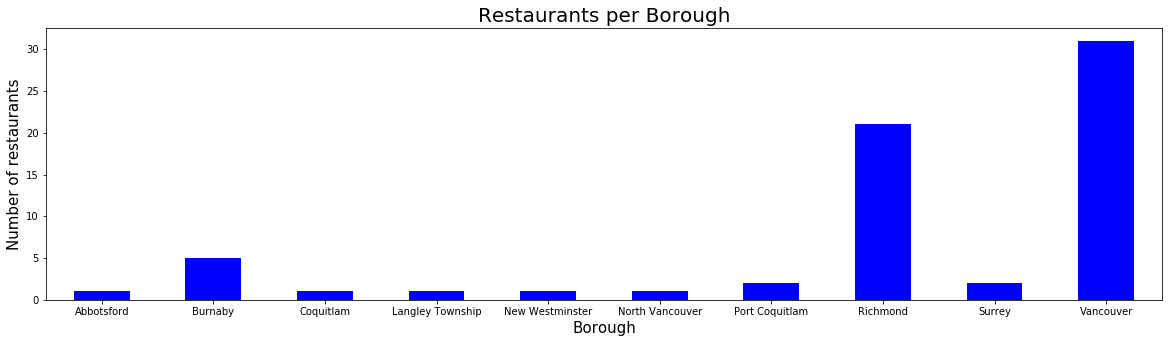

In [44]:
final_merged_df.groupby('Borough')['ID'].count().plot.bar(figsize=(20,5), color="blue")
plt.title('Restaurants per Borough', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Number of restaurants',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

## Discussion and Conclusion
Most of the Chinese restaurants are in  Vancouver. So, we can eat chinese food in Vancouver. If inconvinent, Richmond and Burnaby are also good places to go.  All in all, most of the Chinese restaurants are located in one of these three boroughs. In conclusion, when I meet my friends and want to find a Chinese restaurant, we should stay in either Burnaby, Richmond, or Vancouver.

